# Lesson 15 - Exploring DataFrames

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

## Introduction

In this lesson, we will introduce a few tools that can be used to obtain information about a Spark DataFrame. To illustrate the use of these tools, we will explore the [Census Income Dataset](http://archive.ics.uci.edu/ml/datasets/Census+Income) from the UCI Machine Learning Repository.

In [0]:
census_schema = (
    'age INTEGER, workclass STRING, fnlwgt INTEGER, education STRING, educ_num INTEGER, '
    'marital_status STRING, occupation STRING, relationship STRING, race STRING, '
    'sex STRING, capital_gain INTEGER, capital_loss INTEGER, hrs_per_week INTEGER, '
    'native_country STRING, salary STRING'
)

census = (
    spark.read
    .option('delimiter', ',')
    .option('header', True)
    .schema(census_schema)
    .csv('/FileStore/tables/census.csv')
)
    
census.printSchema()

root
-- age: integer (nullable = true)
-- workclass: string (nullable = true)
-- fnlwgt: integer (nullable = true)
-- education: string (nullable = true)
-- educ_num: integer (nullable = true)
-- marital_status: string (nullable = true)
-- occupation: string (nullable = true)
-- relationship: string (nullable = true)
-- race: string (nullable = true)
-- sex: string (nullable = true)
-- capital_gain: integer (nullable = true)
-- capital_loss: integer (nullable = true)
-- hrs_per_week: integer (nullable = true)
-- native_country: string (nullable = true)
-- salary: string (nullable = true)

As seen in the previous lesson, we can use the `show()` method to display the first few rows in a DataFrame.

In [0]:
census.show(10)

+---+-----------+------+------------+--------+--------------+-----------------+--------------+-----+------+------------+------------+------------+--------------+------+
age| workclass|fnlwgt| education|educ_num|marital_status| occupation| relationship| race| sex|capital_gain|capital_loss|hrs_per_week|native_country|salary|
+---+-----------+------+------------+--------+--------------+-----------------+--------------+-----+------+------------+------------+------------+--------------+------+
 90| null| 77053| HS-grad| 9| Widowed| null| Not-in-family|White|Female| 0| 4356| 40| United-States| <=50K|
 82| Private|132870| HS-grad| 9| Widowed| Exec-managerial| Not-in-family|White|Female| 0| 4356| 18| United-States| <=50K|
 66| null|186061|Some-college| 10| Widowed| null| Unmarried|Black|Female| 0| 4356| 40| United-States| <=50K|
 54| Private|140359| 7th-8th| 4| Divorced|Machine-op-inspct| Unmarried|White|Female| 0| 3900| 40| United-States| <=50K|
 41| Private|264663|Some-college| 10| Separated| Prof-specialty| Own-child|White|Female| 0| 3900| 40| United-States| <=50K|
 34| Private|216864| HS-grad| 9| Divorced| Other-service| Unmarried|White|Female| 0| 3770| 45| United-States| <=50K|
 38| Private|150601| 10th| 6| Separated| Adm-clerical| Unmarried|White| Male| 0| 3770| 40| United-States| <=50K|
 74| State-gov| 88638| Doctorate| 16| Never-married| Prof-specialty|Other-relative|White|Female| 0| 3683| 20| United-States| >50K|
 68|Federal-gov|422013| HS-grad| 9| Divorced| Prof-specialty| Not-in-family|White|Female| 0| 3683| 40| United-States| <=50K|
 41| Private| 70037|Some-college| 10| Never-married| Craft-repair| Unmarried|White| Male| 0| 3004| 60| null| >50K|
+---+-----------+------+------------+--------+--------------+-----------------+--------------+-----+------+------------+------------+------------+--------------+------+
only showing top 10 rows

## The `Count()` Method

Like RDDs, Spark DataFrames are bestowed with a `count()` method that can be used to determine the number of rows within the DataFrame.

In [0]:
nrows = census.count()
print(f'There are {nrows} rows in the DataFrame.')

There are 32561 rows in the DataFrame.

## Column Names and Data Types 

As disucssed in the previous lesson, every DataFrame has a `columns` attribute that contains a list of the names of the columns within the DataFrame. 
Every Spark DataFrame has a `columns` attribute containing a list of column names.

In [0]:
print(census.columns)

['age', 'workclass', 'fnlwgt', 'education', 'educ_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country', 'salary']

DataFrames all have a `dtypes` attribute that contains a list of tuples storing the name and data type for each column.

In [0]:
for item in census.dtypes:
    print(item)

('age', 'int')
('workclass', 'string')
('fnlwgt', 'int')
('education', 'string')
('educ_num', 'int')
('marital_status', 'string')
('occupation', 'string')
('relationship', 'string')
('race', 'string')
('sex', 'string')
('capital_gain', 'int')
('capital_loss', 'int')
('hrs_per_week', 'int')
('native_country', 'string')
('salary', 'string')

## The `sample()` Method

Like RDDs, Spark DataFrames have a `sample()` method that can be used to draw a sample of rows from the DataFrame. This method has three parameters. 

* The `withReplacement` parameter accepts a boolean value that indicates if the sampling is to be performed with or without replacement. 
* The `fraction` parameter sets the probability of a given row being sampled. 
* The `seed` parameter sets a random seed.

In [0]:
census.sample(withReplacement=False, fraction=0.0005, seed=1).toPandas()

Out[8]:

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,36,Private,99146,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1887,40,United-States,>50K
1,19,Private,283945,10th,6,Never-married,Handlers-cleaners,Other-relative,White,Male,0,1602,45,United-States,<=50K
2,47,Federal-gov,34845,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,Germany,>50K
3,32,Self-emp-not-inc,97723,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,59,Private,268840,Some-college,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,0,16,United-States,>50K
5,43,Self-emp-not-inc,315971,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
6,40,Private,82161,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
7,20,Private,353195,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,35,United-States,<=50K
8,34,Self-emp-not-inc,319165,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
9,31,Private,156493,HS-grad,9,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K


The sample method is useful for creating plots to explore very large datasets. Suppose that we wished to explore the replationship between two variables by creating a scatter plot. The node hosting the driver process would need to have access to all observations that were to be used in the scatter plot. If the dataset is too large to fit in memory on a single node, then it will not be feasible to create a scatter plot using the entire dataset. In this situation, we can instead draw a sample that is small enough to fit into memory on a single node, but is large enough to hopefully be representative of the entire dataset. 

We illustrate this process in the cell below. We draw a sample that contains roughly 5% of the original dataset and store this sample as a pandas DataFrame. We then use the data in the pandas DataFrame to create a scatter plot.

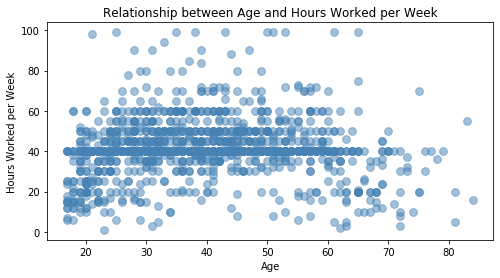

In [0]:
sample_pdf = census.sample(withReplacement=False, fraction=0.05, seed=1).toPandas()

plt.figure(figsize=[8,4])
plt.scatter(sample_pdf.age, sample_pdf.hrs_per_week, 
            alpha=0.5, c='steelblue', s=60)
plt.title('Relationship between Age and Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')
plt.show()

## The `describe()` and `summary()` Methods

The `describe()` and `summary()` methods provide summary statistics for each of the columns in a DataFrame. Calling `describe()` will provide the count, mean, standard deviation, min, and max of each column. The `summary()` method will provide all of the information given by `describe()`, as well as the 25th, 50th, and 75th percentiles. 

We illustrate the use of `summary()` in the cell below. Note that this method is a transformation. We need to use a method such as `show()` or `toPandas()` to display the resulting DataFrame.

In [0]:
census.summary().toPandas()

Out[11]:

,0,1,2,3,4,5,6,7
summary,count,mean,stddev,min,25%,50%,75%,max
age,32561,38.58164675532078,13.640432553581295,17,28,37,48,90
workclass,30725,None,None,Federal-gov,None,None,None,Without-pay
fnlwgt,32561,189778.36651208502,105549.97769702264,12285,117802,178353,236994,1484705
education,32561,None,None,10th,None,None,None,Some-college
educ_num,32561,10.0806793403151,2.572720332067391,1,9,10,12,16
marital_status,32561,None,None,Divorced,None,None,None,Widowed
occupation,30718,None,None,Adm-clerical,None,None,None,Transport-moving
relationship,32561,None,None,Husband,None,None,None,Wife
race,32561,None,None,Amer-Indian-Eskimo,None,None,None,White


## Missing Values

Recall that the `census` DataFrame contains 32,561 rows. Notice that in the summary above the count of elements in some of the columns is less than 32561. This indicates that these columns contain missing values. We can directly count the number of missing values in each column by using the code in the cell below. Note that this code makes use of tools that we will not fully introduce until later lessons.

In [0]:
from pyspark.sql.functions import expr
nrows = census.count()
census.select([expr(f'{nrows} - COUNT({c}) AS {c}') for c in census.columns]).toPandas()
#.show()

Out[15]:

,0
age,0
workclass,1836
fnlwgt,0
education,0
educ_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


Missing values do not always present a problem, but that can cause errors to occur when performing certain types of analysis. There are many ways of dealing with missing values. Two of the most common are to remove the rows containing the missing values, or to fill in the missing values with some constant value. These tasks can be performed using the `dropna()` and `fillna()` transformations.

### Dropping Rows with Missing Values

We can use the `dropna()` method to remove from a DataFrame any rows containing missing values. Note that `dropna()` is a transformation, so it will return a new DataFrame from which the rows have been removed.

In [0]:
census_dropped = census.dropna()
nrows_complete = census_dropped.count()

print('Number of rows in original DataFrame: ', nrows)
print('Number of rows with no missing values:', nrows_complete)

We can also use the `dropna()` method to conveniently count the number of records that contain missing values. Note that this does not tell you how many missing values exist in any given column, or how many columns have missing values.

In [0]:
print(census.count() - census.dropna().count())

### Filling Missing Values

We can use the `fillna()` transformation to fill in all of the missing values in selected columns of a DataFrame with a specified constant. This method accepts two arguments, `value` and `subset`. The `value` parameter can be any value that is to be used to fill in the missing values. The `subset` parameter is expected to be a list of names of columns to have their missing values filled. If no list is provided to `subset`, then all missing values in all columns will be filled with the same value.

In [0]:
census_filled = census.fillna('unknown')

census_filled.show(10)

In [0]:
print(census_filled.count() - census_filled.dropna().count())